<a href="https://colab.research.google.com/github/ericlrf/fbprophet/blob/main/fbprophet_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
!pip install fbprophet

# **Test 1**

In [11]:
import yfinance
from fbprophet import Prophet
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = yfinance.download('MGLU3.SA', start='2018-01-01', end=datetime.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2.528130,2.574370,2.450310,2.478130,2.309358,59427200
2018-01-03,2.468750,2.542500,2.422500,2.446880,2.280236,41385600
2018-01-04,2.500000,2.516250,2.478130,2.505630,2.334985,47936000
2018-01-05,2.514060,2.528440,2.448440,2.456250,2.288968,30684800
2018-01-08,2.453120,2.503440,2.448440,2.456560,2.289257,28796800
...,...,...,...,...,...,...
2020-12-17,24.860001,25.110001,24.360001,24.540001,24.540001,23427200
2020-12-18,24.480000,24.629999,24.100000,24.450001,24.450001,18149600
2020-12-21,23.930000,25.379999,23.610001,25.000000,25.000000,52188800


In [9]:
df = pd.DataFrame()
df['y'] = data[data.columns[3]]
df['ds'] = data.index

In [10]:
df

,y,ds
Date,,
2018-01-02,2.478130,2018-01-02
2018-01-03,2.446880,2018-01-03
2018-01-04,2.505630,2018-01-04
2018-01-05,2.456250,2018-01-05
2018-01-08,2.456560,2018-01-08
...,...,...
2020-12-17,24.540001,2020-12-17
2020-12-18,24.450001,2020-12-18
2020-12-21,25.000000,2020-12-21


In [12]:
modelo = Prophet(daily_seasonality=True)

In [16]:
type(modelo) # objeto prophet

fbprophet.forecaster.Prophet

In [13]:
modelo.fit(df) # executar essa funcao apenas unica vez no notebook

In [14]:
futuro = modelo.make_future_dataframe(periods=35)

In [19]:
# objeto dataframe apenas com coluna 'ds' original (sem index)
futuro # acrescido com mais (771 - 736) = 35 linhas/datestamps a mais

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
766,2021-01-23
767,2021-01-24
768,2021-01-25
769,2021-01-26


In [15]:
predicoes = modelo.predict(futuro)

In [20]:
# objeto dataframe com coluna 'ds' aumentada (35 datestamps)
predicoes # dataframe com 21 novas colunas derivadas da coluna 'y' (target) original

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,2.333328,1.257632,3.091826,2.333328,2.333328,-0.197392,-0.197392,-0.197392,-0.516525,-0.516525,-0.516525,-0.017335,-0.017335,-0.017335,0.336468,0.336468,0.336468,0.0,0.0,0.0,2.135937
1,2018-01-03,2.367192,1.272357,3.050843,2.367192,2.367192,-0.167287,-0.167287,-0.167287,-0.516525,-0.516525,-0.516525,-0.006186,-0.006186,-0.006186,0.355424,0.355424,0.355424,0.0,0.0,0.0,2.199905
2,2018-01-04,2.401056,1.288076,3.168531,2.401056,2.401056,-0.156406,-0.156406,-0.156406,-0.516525,-0.516525,-0.516525,-0.012959,-0.012959,-0.012959,0.373078,0.373078,0.373078,0.0,0.0,0.0,2.244650
3,2018-01-05,2.434921,1.441397,3.331659,2.434921,2.434921,-0.134567,-0.134567,-0.134567,-0.516525,-0.516525,-0.516525,-0.007419,-0.007419,-0.007419,0.389377,0.389377,0.389377,0.0,0.0,0.0,2.300354
4,2018-01-08,2.536513,1.441117,3.298497,2.536513,2.536513,-0.172117,-0.172117,-0.172117,-0.516525,-0.516525,-0.516525,-0.085233,-0.085233,-0.085233,0.429641,0.429641,0.429641,0.0,0.0,0.0,2.364396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,2021-01-23,28.000286,26.948742,28.907138,27.872791,28.133178,-0.051406,-0.051406,-0.051406,-0.516525,-0.516525,-0.516525,0.064566,0.064566,0.064566,0.400553,0.400553,0.400553,0.0,0.0,0.0,27.948880
767,2021-01-24,28.048065,27.013252,28.968129,27.914867,28.188114,-0.066491,-0.066491,-0.066491,-0.516525,-0.516525,-0.516525,0.064566,0.064566,0.064566,0.385468,0.385468,0.385468,0.0,0.0,0.0,27.981573
768,2021-01-25,28.095844,26.820822,28.908303,27.951114,28.244580,-0.232520,-0.232520,-0.232520,-0.516525,-0.516525,-0.516525,-0.085233,-0.085233,-0.085233,0.369238,0.369238,0.369238,0.0,0.0,0.0,27.863324
769,2021-01-26,28.143623,27.007926,28.917733,27.988811,28.302315,-0.181848,-0.181848,-0.181848,-0.516525,-0.516525,-0.516525,-0.017335,-0.017335,-0.017335,0.352011,0.352011,0.352011,0.0,0.0,0.0,27.961775


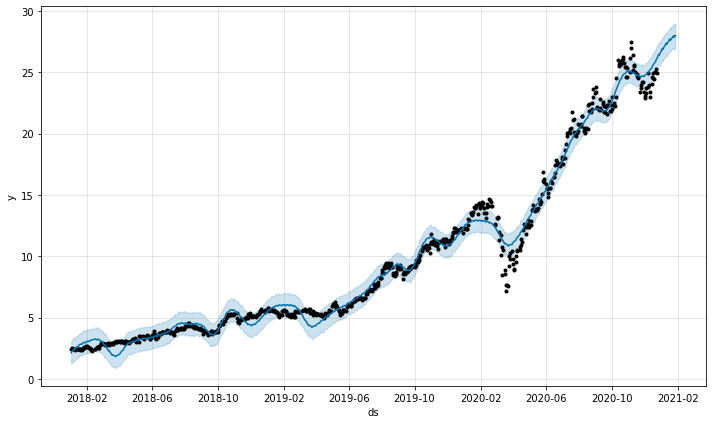

In [21]:
grafico = modelo.plot(predicoes)

In [22]:
type(grafico)

matplotlib.figure.Figure

# **Test 2**